In [12]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [17]:
df_BA_US = df[(df['job_title']== 'Business Analyst') & (df['job_country'] == 'United States')].copy()
df_BA_US['job_posted_month_no'] = df_BA_US['job_posted_date'].dt.month

df_BA_US_explode = df_BA_US.explode('job_skills')
 

Pivot in prep for plotting
month as index and job_skills as the columns

In [18]:
# group by month and job_skills
df_BA_US_pivot = df_BA_US_explode.pivot_table(index = 'job_posted_month_no', 
                                              columns= 'job_skills', 
                                              aggfunc= 'size',
                                              fill_value=0)
df_BA_US_pivot

job_skills,airtable,alteryx,angular,assembly,atlassian,aws,azure,bigquery,c,c#,...,unix,vba,visio,visual basic,vmware,webex,windows,wire,word,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,1,1,0,0,...,1,2,1,0,0,0,0,0,3,0
2,0,1,0,0,0,1,0,0,0,0,...,0,3,0,0,0,0,0,0,2,0
3,0,1,0,0,0,1,0,0,0,0,...,0,2,0,0,0,0,0,0,1,0
4,1,1,0,0,0,3,2,0,0,0,...,0,2,2,0,0,0,0,0,3,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,3,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,2,0
7,0,3,1,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,5,0
8,0,0,0,0,0,1,4,0,1,0,...,1,3,7,1,0,0,0,0,6,0
9,0,1,0,0,0,1,2,0,1,0,...,0,0,4,0,0,1,0,1,9,0


In [20]:
# now sorting the column based on the totals
df_BA_US_pivot.loc['Total'] = df_BA_US_pivot.sum()
df_BA_US_pivot = df_BA_US_pivot[df_BA_US_pivot.loc['Total'].sort_values(ascending=False).index]
df_BA_US_pivot = df_BA_US_pivot.drop('Total')
df_BA_US_pivot

job_skills,excel,sql,tableau,powerpoint,power bi,word,python,jira,sas,flow,...,slack,assembly,matplotlib,vmware,pandas,windows,angular,terminal,nosql,airtable
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,8,12,3,4,3,3,4,2,2,0,...,0,0,1,0,1,0,0,0,0,0
2,11,15,8,5,0,2,1,1,8,4,...,0,0,0,0,0,0,0,0,0,0
3,9,9,6,2,4,1,2,2,4,1,...,0,0,0,0,0,0,0,0,0,0
4,17,15,6,6,4,3,4,3,0,3,...,0,0,0,0,0,0,0,0,0,1
5,6,5,2,2,0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,5,7,1,2,3,2,0,2,0,1,...,0,0,0,1,0,0,0,0,0,0
7,14,10,7,6,5,5,3,2,2,0,...,0,1,0,0,0,0,1,0,0,0
8,19,21,12,10,9,6,7,6,0,5,...,0,0,0,0,0,0,0,0,0,0
9,27,22,12,15,10,9,3,4,6,5,...,0,0,0,0,0,0,0,0,1,0


Plotting the Monthly Skill Counts

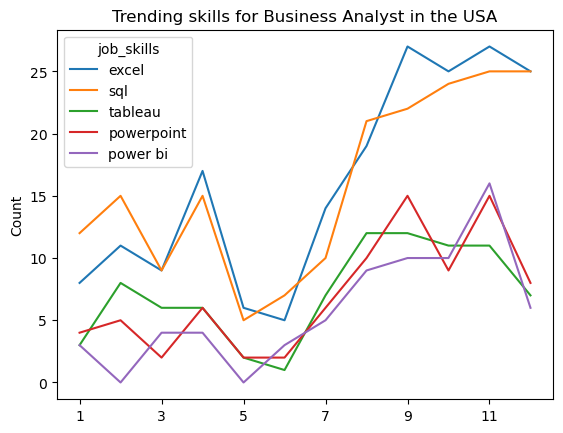

In [22]:
df_BA_US_pivot.iloc[:, :5].plot(kind = 'line')
plt.title('Trending skills for Business Analyst in the USA')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [23]:
# Get monthly total and we will plot the percentage of the total jobs
BA_Totals = df_BA_US.groupby('job_posted_month_no').size()
BA_Totals

job_posted_month_no
1     16
2     22
3     21
4     29
5     11
6     17
7     25
8     48
9     60
10    68
11    64
12    56
dtype: int64

In [24]:
# divide the first 12 rows of the BA_pivot bt BA_totals
df_BA_US_percent = df_BA_US_pivot.iloc[:12].div(BA_Totals/100, axis=0)
# changes month number to month name
df_BA_US_percent = df_BA_US_percent.reset_index()
df_BA_US_percent['job_posted_month'] = df_BA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_BA_US_percent = df_BA_US_percent.set_index('job_posted_month')
df_BA_US_percent = df_BA_US_percent.drop(columns='job_posted_month_no')

df_BA_US_percent

job_skills,excel,sql,tableau,powerpoint,power bi,word,python,jira,sas,flow,...,slack,assembly,matplotlib,vmware,pandas,windows,angular,terminal,nosql,airtable
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,50.000000,75.000000,18.750000,25.000000,18.750000,18.750000,25.000000,12.500000,12.500000,0.000000,...,0.000000,0.0,6.25,0.000000,6.25,0.000000,0.0,0.0000,0.000000,0.000000
Feb,50.000000,68.181818,36.363636,22.727273,0.000000,9.090909,4.545455,4.545455,36.363636,18.181818,...,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.0,0.0000,0.000000,0.000000
Mar,42.857143,42.857143,28.571429,9.523810,19.047619,4.761905,9.523810,9.523810,19.047619,4.761905,...,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.0,0.0000,0.000000,0.000000
Apr,58.620690,51.724138,20.689655,20.689655,13.793103,10.344828,13.793103,10.344828,0.000000,10.344828,...,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.0,0.0000,0.000000,3.448276
May,54.545455,45.454545,18.181818,18.181818,0.000000,27.272727,9.090909,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.0,0.0000,0.000000,0.000000
Jun,29.411765,41.176471,5.882353,11.764706,17.647059,11.764706,0.000000,11.764706,0.000000,5.882353,...,0.000000,0.0,0.00,5.882353,0.00,0.000000,0.0,0.0000,0.000000,0.000000
Jul,56.000000,40.000000,28.000000,24.000000,20.000000,20.000000,12.000000,8.000000,8.000000,0.000000,...,0.000000,4.0,0.00,0.000000,0.00,0.000000,4.0,0.0000,0.000000,0.000000
Aug,39.583333,43.750000,25.000000,20.833333,18.750000,12.500000,14.583333,12.500000,0.000000,10.416667,...,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.0,0.0000,0.000000,0.000000
Sep,45.000000,36.666667,20.000000,25.000000,16.666667,15.000000,5.000000,6.666667,10.000000,8.333333,...,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.0,0.0000,1.666667,0.000000


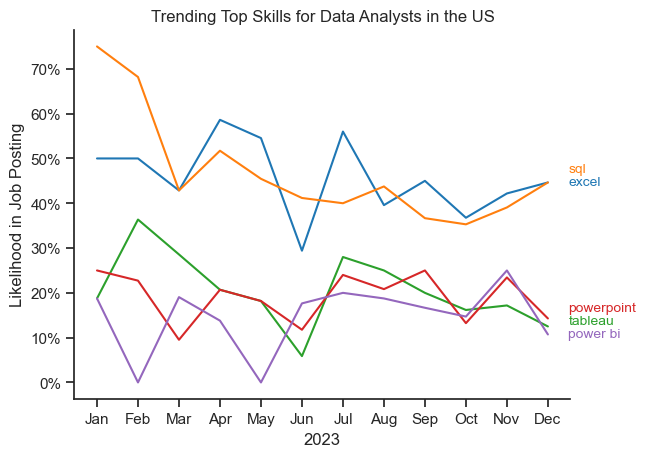

In [59]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

df_plot = df_BA_US_percent.iloc[:, :5]
palette = sns.color_palette("tab10", n_colors=df_plot.shape[1])

sns.lineplot(data=df_plot, dashes=False, legend='full', palette=palette)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# get y-values of last points
y_positions = df_plot.iloc[-1, :].values
label_positions = y_positions.copy()

# sort indices by y-values for placement
sorted_idx = np.argsort(label_positions)

# minimum spacing between labels in y-axis units
min_spacing = 3

# adjust positions dynamically
for i in range(1, len(sorted_idx)):
    prev_idx = sorted_idx[i-1]
    curr_idx = sorted_idx[i]
    if label_positions[curr_idx] - label_positions[prev_idx] < min_spacing:
        label_positions[curr_idx] = label_positions[prev_idx] + min_spacing

# annotate labels
for i, col in enumerate(df_plot.columns):
    plt.text(
        x=df_plot.shape[0]-0.5,
        y=label_positions[i],
        s=col,
        color=palette[i],
        fontsize=10,
        va='center',
        ha='left'
    )

plt.show()
